In [1]:
from netCDF4 import Dataset


In [2]:
rootgrp = Dataset('/Users/garmu/Downloads/CloudData/IT_ABI-L2-CMIPF-M3C01_G16_s2005155201500_e2005155203700_c2014058132255.nc', 'r', format='NETCDF4')
print (rootgrp.data_model)
rootgrp.close()

NETCDF4


In [3]:
def walktree(top):
    values = top.groups.values()
    yield values
    for value in top.groups.values():
        for children in walktree(value):
            yield children
            
path='/Users/garmu/Downloads/CloudData/'
fname='IT_ABI-L2-CMIPF-M3C01_G16_s2005155201500_e2005155203700_c2014058132255.nc'
fname='IT_ABI-L2-CMIPF-M3C04_G16_s2005155201500_e2005155203700_c2014058132255.nc'
rootgrp = Dataset(path+fname, 'r', format='NETCDF4')
print (rootgrp.data_model)
print (rootgrp)
for children in walktree(rootgrp):
    for child in children:
        print (child)

NETCDF4
<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0, CF-1.6
    standard_name_vocabulary: CF Standard Name Table (v18, 22 July 2011)
    institution: DOC/NOAA/NESDIS> U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: ITE
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: ABI-1
    spatial_resolution: 2km at nadir
    dataset_name: IT_ABI-L2-CMIPF-M3C04_G16_s2005155201500_e2005155203700_c2014058132255.nc
    iso_series_metadata_id: a54fa0b0-b409-11e1-afa6-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Cloud and Moisture Imagery Products (CMIP) a

In [4]:
a=rootgrp.variables["CMI"][:,:,:]
print (a.shape)
print (a[0,0,0])

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

dat=np.log10(a[0,:,:]+.01)
print (np.max(dat))
print (np.min(dat))







(1, 5424, 5424)
--


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10


0.00432096
-2.0


('long=', array(-75.0, dtype=float32))
('lat=', array(0.0, dtype=float32))
('height=', array(42164.16015625, dtype=float32))
--
8.70002034438


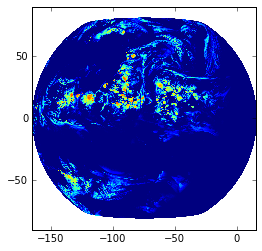

In [5]:
nominal_satellite_subpoint_lon=rootgrp.variables["nominal_satellite_subpoint_lon"][:]
nominal_satellite_subpoint_lat=rootgrp.variables["nominal_satellite_subpoint_lat"][:]
nominal_satellite_height=rootgrp.variables["nominal_satellite_height"][:]
geospatial_lat_lon_extent=rootgrp.variables["geospatial_lat_lon_extent"][:]

y=rootgrp.variables["y"][:]
x=rootgrp.variables["x"][:]



print ('long=',nominal_satellite_subpoint_lon)
print ('lat=',nominal_satellite_subpoint_lat )
print ('height=',nominal_satellite_height)
print (geospatial_lat_lon_extent)


#plt.plot(y)




print ((max(y))*180/np.pi)

radtodeg=180./np.pi
minx=-90-75
miny=-90-0
maxx=90-75
maxy=90-0

plt.imshow(dat, extent=(minx, maxx, miny, maxy ), origin='upper')


In [6]:
print (rootgrp.variables)

OrderedDict([(u'CMI', <type 'netCDF4._netCDF4.Variable'>
int16 CMI(t, y, x)
    _FillValue: -1
    _Unsigned: true
    scale_factor: 0.0002442
    add_offset: 0.0
    coverage_content_type: physicalMeasurement
    long_name: reflectance factor per pixel
    standard_name: cloud_reflectance_factor
    grid_mapping: goes_imager_projection
    coordinates: t y x
    ancillary_variables: DQF
unlimited dimensions: 
current shape = (1, 5424, 5424)
filling on), (u'DQF', <type 'netCDF4._netCDF4.Variable'>
int8 DQF(t, y, x)
    _FillValue: -1
    _Unsigned: true
    coverage_content_type: qualityInformation
    standard_name: cloud_reflectance_factor status_flag
    long_name: cmi data quality flags per pixel
    flag_masks: 3b 3b 3b 3b
    flag_values: 0 1 2 3
    flag_meanings: good_pixel conditionally_usable_pixel out_of_range_pixel no_value_pixel
    grid_mapping: goes_imager_projection
    coordinates: t y x
unlimited dimensions: 
current shape = (1, 5424, 5424)
filling on), (u'goes_imager

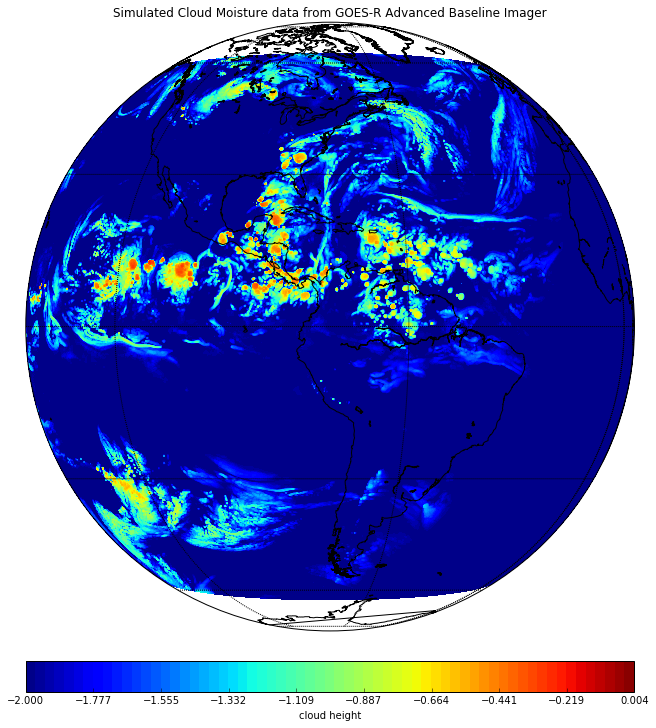

In [7]:
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(12,12))

m = Basemap(projection='ortho',lon_0=-75,lat_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
ny = dat.shape[0]; nx = dat.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) 
clevs = np.linspace(-2,0.004,64)
cs = m.contourf(x,y,np.flipud(dat),clevs, origin='upper')
#m.drawmapboundary(fill_color='aqua')
plt.title("Simulated Cloud Moisture data from GOES-R Advanced Baseline Imager")

cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('cloud height')


plt.show()


In [10]:
print (lons)

[[  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 ..., 
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]]


In [11]:
print (lons)

[[  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 ..., 
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]
 [  1.00000000e+30   1.00000000e+30   1.00000000e+30 ...,   1.00000000e+30
    1.00000000e+30   1.00000000e+30]]
